<a href="https://colab.research.google.com/github/AritraN18/Aritra-Nandy/blob/main/Copy_of_Techno_colab_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import ll libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
#website url we need to exytract data is assigned to variable url
url = "https://www.rbi.org.in/Scripts/ATMView.aspx#"
#initialise url_id
url_id = 134
link_list = []
#for getting each data set a for loop with 12 iteration
for each_url in range(1, 13):
    url_new = url + str(url_id)# Construct the complete URL with the current URL ID
    response = requests.get(url_new) # Send a GET request to the URL

    soup = BeautifulSoup(response.text, "html.parser") # Create a BeautifulSoup object to parse the HTML content
    table = soup.find("table", class_="tablebg") # Find the table element with the specified class

    # Find all the anchor tags within the table
    links = table.find_all("a")

    # Extract and print the link addresses
    for link in links:
        address = link["href"]
        # print(address)
        link_list.append(address)

    url_id = int(url_id) + 1 # Increment the URL ID for the next iteration

pdf_links = []
xlsx_links = []

for link in link_list:
    if link.endswith('.PDF'):
        pdf_links.append(link)
    elif link.endswith('.XLSX'):
        xlsx_links.append(link)

import requests
import pandas as pd
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

dfs = []

for link in xlsx_links:
    response = requests.get(link)
    df = pd.read_excel(response.content, engine='openpyxl')
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe as an xlsx file
combined_df.to_excel('combined.xlsx', index=False)

New Data map ploating


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/Merged file (1).xlsx')

In [ ]:
df.columns = ['bank name', 'ATM-on-site', 'ATM-off-site', 'pos', 'microAtm', 'Bharat QR codes', 'UPI QR codes', 'credit card', 'debit card', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)', 'Volume (in actuals)', 'Value (in Rs\'000)']


In [ ]:
df.head()

,bank name,ATM-on-site,ATM-off-site,pos,microAtm,Bharat QR codes,UPI QR codes,credit card,debit card,Volume (in actuals),...,Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000)
0,BANK OF INDIA,5159.0,2695.0,47271.0,11956.0,103.0,470903.0,150601.0,45494860.0,151042.0,...,4897791.0,8225723.0,2341569.0,3254500.0,0.0,0.0,17828989.0,67479100.0,3612.0,3431.0
1,BANK OF MAHARASHTRA,1771.0,433.0,2963.0,0.0,355014.0,941703.0,76504.0,12915821.0,86079.0,...,2343844.0,3501658.0,955955.0,1286687.0,8567.0,94084.0,7224220.0,29786138.0,0.0,0.0
2,CANARA BANK,8088.0,4107.0,50792.0,8906.0,66.0,1641626.0,527272.0,47715491.0,680723.0,...,9614683.0,19132177.0,3643427.0,6594791.0,4379.0,69357.0,31568115.0,138544861.0,1738.0,1544.0
3,CENTRAL BANK OF INDIA,1788.0,342.0,2592.0,8982.0,8448.0,198295.0,0.0,27556286.0,0.0,...,2740197.0,5530720.0,758067.0,1367012.0,0.0,0.0,8553106.0,36504729.0,9633.0,9718.0
4,INDIAN BANK,4233.0,592.0,14545.0,9759.0,0.0,404911.0,163346.0,28371703.0,132517.0,...,5912361.0,11008811.0,2685725.0,4123348.0,5048.0,75390.0,20432560.0,92726764.0,42433.0,42013.0


In [ ]:
df.shape

(301, 27)

In [ ]:
df.isnull().sum()

bank name               4
ATM-on-site             9
ATM-off-site           11
pos                     4
microAtm                4
Bharat QR codes         4
UPI QR codes            4
credit card             4
debit card              4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
dtype: int64

In [ ]:
df.describe()

,ATM-on-site,ATM-off-site,pos,microAtm,Bharat QR codes,UPI QR codes,credit card,debit card,Volume (in actuals),Value (in Rs'000),...,Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000)
count,292.000000,290.000000,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,...,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,297.000000,297.000000
mean,2029.561644,1660.220690,1.218176e+05,21614.151515,8.115830e+04,3.759693e+06,1.331401e+06,1.558282e+07,2.258170e+06,7.832385e+06,...,3.199838e+06,6.735564e+06,1.525907e+06,3.384253e+06,6621.461279,6.357841e+04,9.637329e+06,4.552119e+07,3886.505051,4050.289562
std,4066.081547,5525.768459,3.320721e+05,65345.393275,2.469574e+05,1.757914e+07,3.511070e+06,3.791274e+07,6.336730e+06,2.245856e+07,...,8.049059e+06,1.721545e+07,3.887986e+06,8.648408e+06,47152.648330,3.294808e+05,2.650270e+07,1.277184e+08,12582.517332,14025.378037
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,46.750000,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.370830e+05,0.000000e+00,0.000000e+00,...,4.820400e+04,8.599500e+04,1.698800e+04,3.323500e+04,0.000000,0.000000e+00,2.461950e+05,1.196344e+06,0.000000,0.000000
50%,458.000000,63.500000,2.536000e+03,164.000000,0.000000e+00,3.734500e+04,1.056500e+04,3.660711e+06,2.335600e+04,1.172160e+05,...,5.189110e+05,1.069100e+06,2.299530e+05,4.629940e+05,0.000000,0.000000e+00,1.625443e+06,6.280063e+06,0.000000,0.000000
75%,1619.000000,666.750000,3.687800e+04,8032.000000,7.576000e+03,4.259260e+05,6.034900e+05,1.281640e+07,6.807230e+05,2.429179e+06,...,2.342013e+06,4.462567e+06,9.630380e+05,2.180467e+06,146.000000,3.790000e+03,6.979613e+06,3.217572e+07,227.000000,170.000000
max,25780.000000,40016.000000,1.534885e+06,355370.000000,1.666911e+06,1.329285e+08,1.701226e+07,2.783565e+08,3.479424e+07,1.515730e+08,...,5.922325e+07,1.301914e+08,2.736258e+07,5.455468e+07,551589.000000,3.156927e+06,2.065163e+08,1.006311e+09,63627.000000,131443.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bank name            297 non-null    object 
 1   ATM-on-site          292 non-null    float64
 2   ATM-off-site         290 non-null    float64
 3   pos                  297 non-null    float64
 4   microAtm             297 non-null    float64
 5   Bharat QR codes      297 non-null    float64
 6   UPI QR codes         297 non-null    float64
 7   credit card          297 non-null    float64
 8   debit card           297 non-null    float64
 9   Volume (in actuals)  297 non-null    float64
 10  Value (in Rs'000)    297 non-null    float64
 11  Volume (in actuals)  297 non-null    float64
 12  Value (in Rs'000)    297 non-null    float64
 13  Volume (in actuals)  297 non-null    float64
 14  Value (in Rs'000)    297 non-null    float64
 15  Volume (in actuals)  297 non-null    flo

In [ ]:
df.isnull().sum()

bank name               4
ATM-on-site             9
ATM-off-site           11
pos                     4
microAtm                4
Bharat QR codes         4
UPI QR codes            4
credit card             4
debit card              4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
Volume (in actuals)     4
Value (in Rs'000)       4
dtype: int64

In [ ]:
# Using loc
null_banks_loc = df.loc[df['bank name'].isnull()]

# # Using iloc
# null_rows = df['bank name'].isnull().to_numpy().nonzero()[0]  # Get the indices of the null rows
# null_banks_iloc = df.iloc[null_rows]


In [ ]:
null_banks_loc

,bank name,ATM-on-site,ATM-off-site,pos,microAtm,Bharat QR codes,UPI QR codes,credit card,debit card,Volume (in actuals),...,Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000),Volume (in actuals),Value (in Rs'000)
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset=['bank name'])


In [ ]:
df.shape

(297, 27)

In [ ]:
df.isnull().sum()

bank name              0
ATM-on-site            5
ATM-off-site           7
pos                    0
microAtm               0
Bharat QR codes        0
UPI QR codes           0
credit card            0
debit card             0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
Volume (in actuals)    0
Value (in Rs'000)      0
dtype: int64

In [ ]:
df['ATM-on-site'].value_counts()

0.0       52
373.0      6
231.0      5
59.0       5
1.0        5
          ..
2716.0     1
4230.0     1
1688.0     1
8087.0     1
255.0      1
Name: ATM-on-site, Length: 152, dtype: int64

In [ ]:
df['ATM-on-site'].unique()

array([5.1590e+03, 1.7710e+03, 8.0880e+03, 1.7880e+03, 4.2330e+03,
       2.7190e+03, 7.7700e+02, 8.2090e+03, 2.5721e+04, 2.1640e+03,
       8.0420e+03, 5.7830e+03, 4.2300e+02, 1.1200e+03, 4.5100e+02,
       3.7300e+02, 2.1700e+02, 1.5180e+03, 9.1540e+03, 8.6400e+03,
       2.2120e+03, 5.8600e+02, 1.5550e+03, 8.4800e+02, 8.3900e+02,
       1.3770e+03, 1.4470e+03, 8.5600e+02, 4.7700e+02, 1.0670e+03,
       0.0000e+00, 4.7000e+01, 4.5700e+02, 1.3000e+01, 4.6000e+01,
              nan, 9.9000e+01, 1.0000e+00, 4.5200e+02, 1.6500e+02,
       3.4000e+02, 4.3900e+02, 1.2900e+02, 5.9000e+01, 8.0000e+00,
       4.9400e+02, 2.3100e+02, 2.3400e+02, 8.7770e+03, 5.2740e+03,
       1.7860e+03, 8.0870e+03, 1.6880e+03, 4.2300e+03, 2.7160e+03,
       7.7800e+02, 8.1520e+03, 2.5780e+04, 2.1790e+03, 5.7990e+03,
       4.2700e+02, 1.1220e+03, 4.5400e+02, 2.1900e+02, 1.5250e+03,
       9.2290e+03, 8.6870e+03, 2.2110e+03, 6.0200e+02, 1.5590e+03,
       8.5000e+02, 8.4200e+02, 1.3830e+03, 1.4560e+03, 3.7200e

<Axes: xlabel='ATM-on-site', ylabel='Density'>

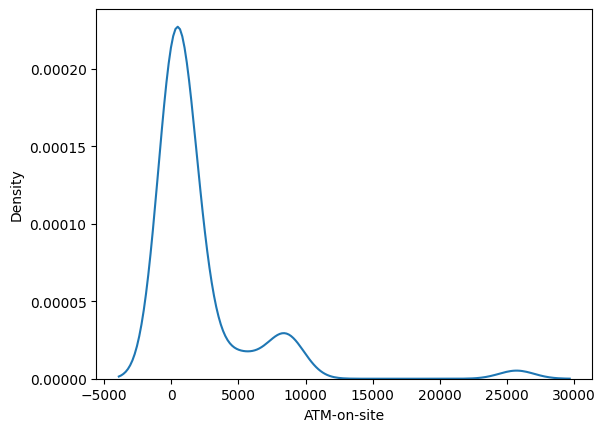

In [ ]:
sns.kdeplot(x='ATM-on-site',data=df)


In [ ]:
median = df['ATM-on-site'].median()
median

458.0

In [ ]:
df = df['ATM-on-site'].fillna(median, inplace = True)

In [ ]:
df_copy = df.copy()

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
df['ATM-off-site'].unique()

TypeError: 'NoneType' object is not subscriptable

<Axes: xlabel='ATM-off-site', ylabel='Density'>

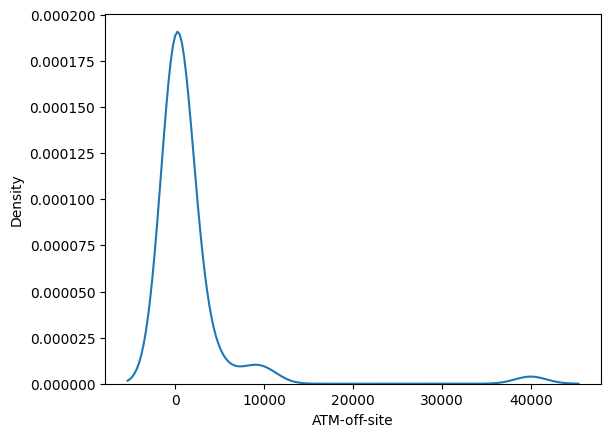

In [ ]:
sns.kdeplot(x='ATM-off-site',data=df_copy)

In [ ]:
median = df_copy['ATM-off-site'].median()
median

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df_copy = df_copy['ATM-off-site'].fillna(median, inplace = True)